In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
from enum import Enum
from collections import Counter

# Generátor náhodných čísel

In [2]:
def rng_uniform():
    rng = np.random.default_rng()
    # Random uniform distribution of forces between -3 and 3 kN
    random_forces = rng.uniform(-3, 3, 12)*1000

    # random number of zero forces
    zero_forces = int(rng.uniform(0, 12))

    # Generate 12 unique random integers between 0 and 11 uniformly distributed
    random_indexes = rng.choice(
        np.arange(12), size=zero_forces, replace=False).tolist()

    # overwrite random_forces with zeros at random_indexes
    random_forces[random_indexes] = 0.00001
    list = random_forces.tolist()

    # create 4 lists of 3 elements each
    random_forces = [list[i:i + 3] for i in range(0, len(list), 3)]
    return random_forces


In [3]:
class Node(Enum):
    A = 0
    B = 1
    C = 2
    D = 3

## Generátor sa skladá z troch častí:

1. Generovanie 12 náhodných síl v rozmedzí od -3000 do 3000
2. Generovanie náhodného počtu síl v rozmedzí od 0 do 11, ktoré budu nulové
3. Generovanie presného počtu náhodných indexov podľa počtu nulových síl

**Tvar výstupu**

In [4]:
rng_uniform()

[[1e-05, -2940.204180147616, 1e-05],
 [-1152.0668089461897, 443.501703575234, -2492.6081998618774],
 [1e-05, 1e-05, 1e-05],
 [1e-05, 1e-05, 1e-05]]

## Zobrazenie síl v priestorovom grafe

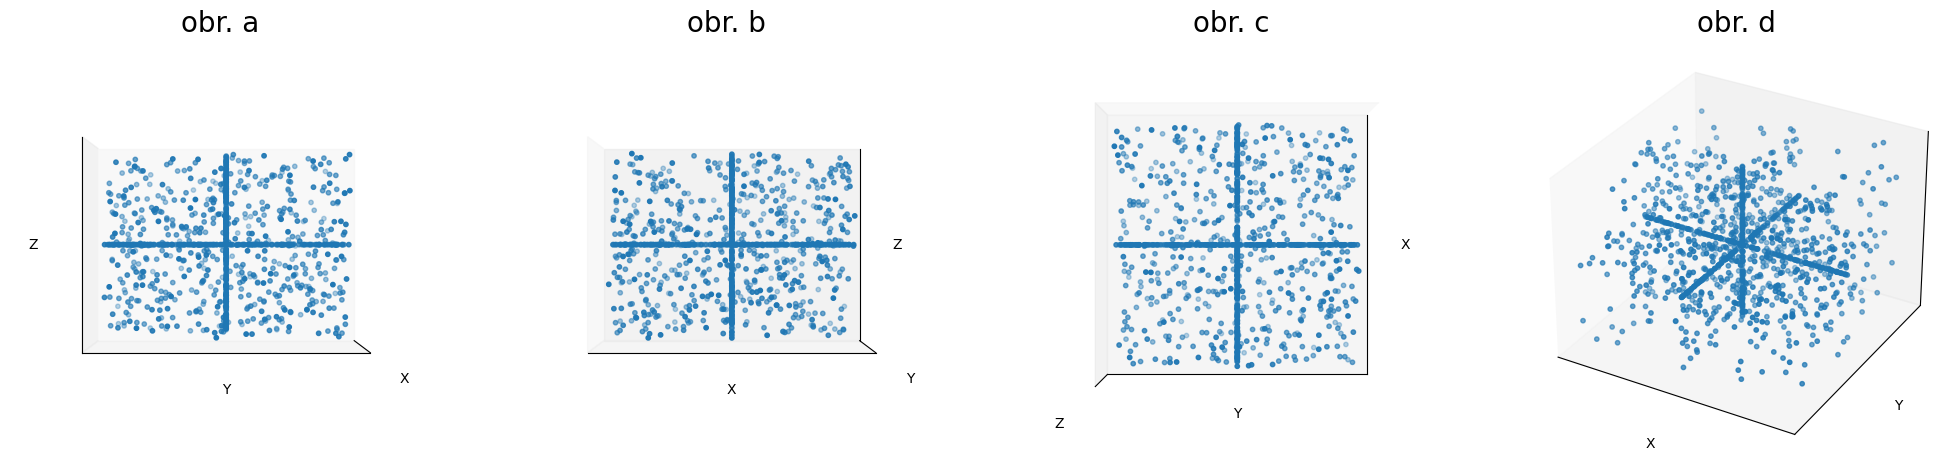

In [5]:
results_rng = []
for i in range(500):
    results_rng.append(rng_uniform())


x = [res[0] for res in results_rng]
y = [res[1] for res in results_rng]
z = [res[2] for res in results_rng]

fig, ax = plt.subplots(1, 4, figsize=(25, 25), subplot_kw={'projection': '3d'})


ax[0].view_init(elev=0, azim=0)
ax[1].view_init(elev=0, azim=90)
ax[2].view_init(elev=90, azim=180)
ax[3].view_init()

ax[0].set_title('obr. a', fontdict={'fontsize': 20})
ax[1].set_title('obr. b', fontdict={'fontsize': 20})
ax[2].set_title('obr. c', fontdict={'fontsize': 20})
ax[3].set_title('obr. d', fontdict={'fontsize': 20})



for i in range(4):
    ax[i].scatter3D(x, y, z, s=10)
    
    ax[i].set_xlabel('X')
    ax[i].set_ylabel('Y')
    ax[i].set_zlabel('Z')

    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_zticks([])



plt.show()

*obr. a)* pohľad v smere osi `x`

*obr. b)* pohľad v smere osi `y`

*obr. c)* pohľad v smere osi `z`

*obr. d)* Axonometrický pohľad


Jeden bod, reprezentuje tri sily pôsobiace na uzol konštrukcie. Každá sila je reprezentovaná jednou osou.

Vzniknutý kríž v strede je spôsobený generovaním náhodného počtu núl, ktorý je vysvetlený nižšie.

***Počet iterácií je 500.***

---

## Sily v uzle

Keďže rovnaký generátor je použitý pre každý uzol, môžeme sa detailnejšie pozrieť na jeden uzol a jeho tri sily.

Za tohto predpokladu, môžeme uvažovať, že sily v každom uzle sa generujú rovnako náhodne.

In [6]:
def rng_by_node(node: int, iteations: int):
    x = []
    x_zeros = 0
    y = []
    y_zeros = 0
    z = []
    z_zeros = 0

    for i in range(iteations):

        random_forces = rng_uniform()[node]

        x.append(random_forces[0])
        if x[i] == 0.00001:
            x_zeros += 1

        y.append(random_forces[1])
        if y[i] == 0.00001:
            y_zeros += 1
            
        z.append(random_forces[2])
        if z[i] == 0.00001:
            z_zeros += 1
    
    return [x, y, z], [x_zeros, y_zeros, z_zeros]

In [7]:
def event_plot(data: list):
    fig, ax = plt.subplots(1, 3, figsize=(18, 8))
    
    for i in range(3):
        ax[i].eventplot(data[i], orientation="vertical", linewidth=0.5)
        ax[i].set_xticks([])

    ax[0].set_title('obr. a', fontdict={'fontsize': 20})
    ax[1].set_title('obr. b', fontdict={'fontsize': 20})
    ax[2].set_title('obr. c', fontdict={'fontsize': 20})
    
    plt.show()

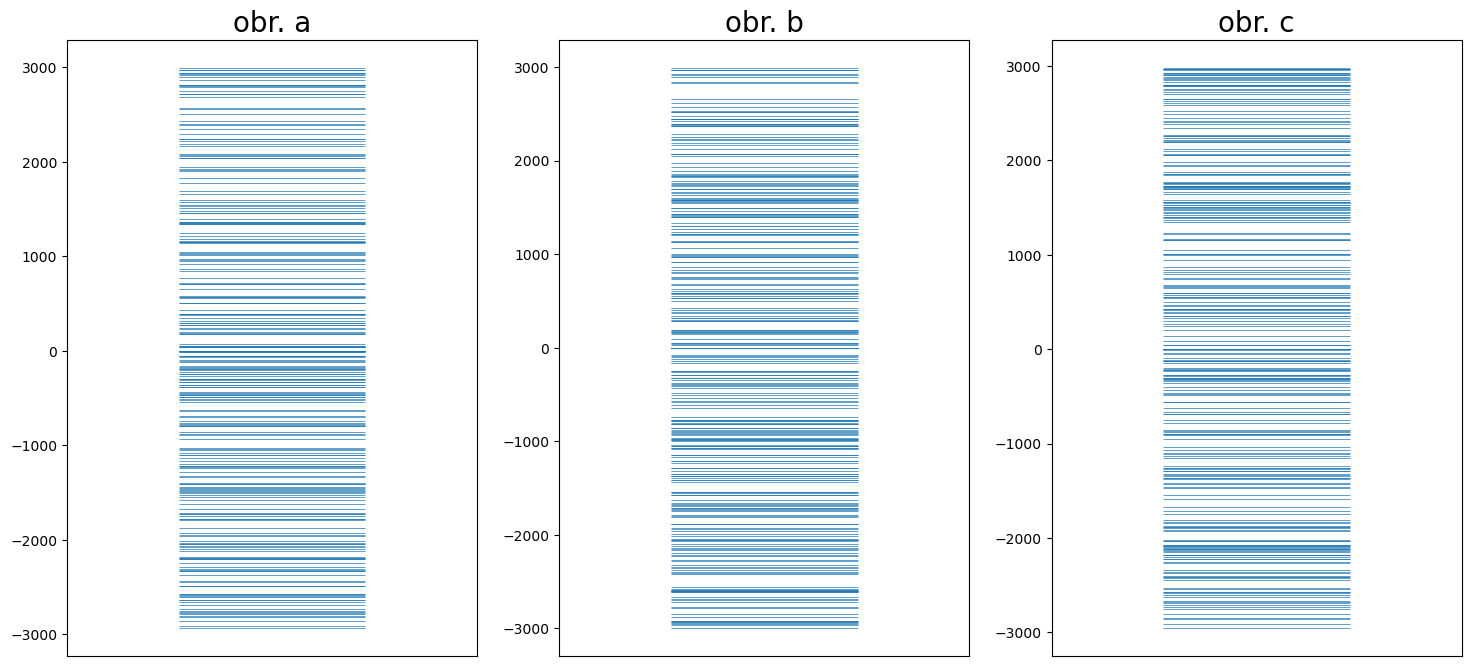

In [8]:
node_A = Node.A.value
data, zeros = rng_by_node(node_A, 500)
event_plot(data)

*a)* sila v smere `x`

*b)* sila v smere `y`

*c)* sila v smere `z`

Na tomto grafe môžeme vidieť, že rozloženie síl v spektre od `-3000 N` do `3000 N` je rovnomerné. 

Smery sú definované prútmi, ktoré sú spojené s uzlom.

***Počet iterácií je 500.***

---

# Počet nulových síl

- Síl máme 12, takže nulových síl môže byť v rozmedzí 0 až 11.
- Náhodne vygenerovanému počtu síl, taktiež náhodne priradíme indexy.

**Príklad:**
- Vygenerujeme 12 náhodných síl.
- Vygenerujeme 5 nulových síl.

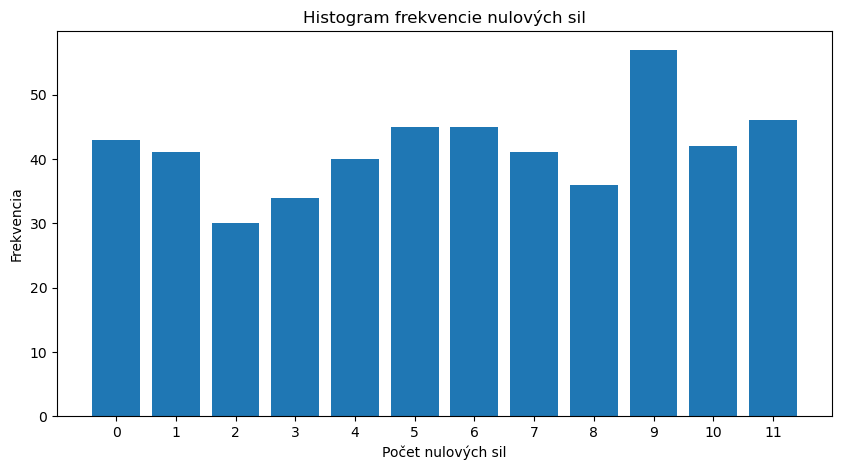

In [13]:
rng = np.random.default_rng()
zero_forces_list = []

for i in range(500):
    zero_forces_list.append(int(rng.uniform(0, 12)))

frequency_zero_forces = Counter(zero_forces_list)
x = frequency_zero_forces.keys()
y = frequency_zero_forces.values()
plt.figure(figsize=(10, 5))
plt.bar(x, y)
plt.xticks(range(12))
plt.xlabel("Počet nulových sil")
plt.ylabel("Frekvencia")
plt.title("Histogram frekvencie nulových sil")
plt.show()


Histogram zobrazuje počet nulových síl.

**Príklad**: 

- Nulová sila sa vyskytla 0x v `X` iteráciách `Y` krat
- Nulová sila sa vyskytla 1x v `X` iteráciách `Y` krat

***Počet iterácií je 500.***

In [11]:
df = pd.DataFrame.from_dict(frequency_zero_forces, orient='index')
df = df.sort_index().rename(columns={0: 'frekvencia'})
df


,frekvencia
0,42
1,35
2,50
3,38
4,44
5,41
6,41
7,46
8,34
9,51


V tabuľke môžeme vidieť jednotlivé hodnoty

---

# Indexy

Počet indexov je rovný počtu nulových síl.

Hodnoty indexov, sú náhodne vygenerované čísla v rozmedzí 0 až 11.

**Príklad:**
- Vygenerujeme 12 náhodných síl.
- Vygenerujeme 5 nulových síl.
- Vygenerujeme 5 náhodných indexov.
- Sily s indexom napríklad 0, 2, 4, 6 a 8 budú nulové.


In [12]:
def random_indexes(size: int):
    rng = np.random.default_rng()
    random_indexes = rng.choice(
        np.arange(12), size=size, replace=False).tolist()
    return random_indexes

In [13]:
random_indexes(5)

[1, 3, 11, 5, 2]

Ak generujeme 5 nulových síl, tak platí

5/12 = 0.4166667 * 500 = 208.3333

Z toho vyplýva, že v priemere sa každý index vyskytne `208.3333` krát.

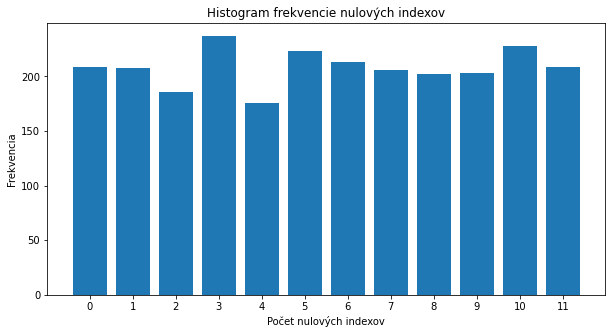

In [14]:
indexes = []

for i in range(500):
    indexes.append(random_indexes(5))

indexes_flat = np.array(indexes).flatten().tolist()

frequency = Counter(indexes_flat)
x = frequency.keys()
y = frequency.values()
plt.figure(figsize=(10, 5))
plt.bar(x, y)
plt.xticks(range(12))
plt.xlabel("Počet nulových indexov")
plt.ylabel("Frekvencia")
plt.title("Histogram frekvencie nulových indexov")
plt.show()

In [15]:
def print_mean(y):
    print(f"Priemer vypočítaný zo všetkých hodnôt na y osi je {np.mean(list(y)):.3f}.")

print_mean(y)

Priemer vypočítaný zo všetkých hodnôt na y osi je 208.333.


# Sucet sil

**Ulohou je zistiť, či máme pokryté extrémy. Tj. že v každom uzle je sila veľmi blízko -3000 N alebo 3000 N.**

In [16]:
results_to_sum = []
for i in range(10000):
    results_to_sum.append(rng_uniform())

np_to_sum = np.array(results_to_sum)

In [17]:
sum_list = []
for i in range(np_to_sum.__len__()):
    flat = np_to_sum[i].flatten()
    sum = np.sum(np.abs(flat))
    sum_list.append(sum)

In [18]:
extreme = 12*3000
extreme

36000

**Extrém je, že každá z 12 síl bude v absolutnej hodnote rovná 3000 N.**

In [19]:
top_10_largest = sorted(sum_list, reverse=True)[:10]
top_10_largest

[27182.489584672767,
 26648.12451653106,
 26443.103840010062,
 25927.066872153704,
 25741.521376391473,
 25559.432995845378,
 25430.51800692678,
 25344.200841190523,
 25255.6761183156,
 24857.351474854888]

To ze je nejaka suma je fajn, ale treba urboit aj manualne aby boli vsade maxima, resp. blizko maxima

Tu môžeme vidieť, že aj pri `10000` iteráciách sme stále ďaleko od extrémov.

Pravdepodobne bude treba urobiť ešte jeden generátor, ktorým pokryjeme extrémy

In [20]:
top_10_smallest = sorted(sum_list)[:10]
top_10_smallest

[4.497013586539867,
 5.902024091533732,
 11.503893737773165,
 16.572521984094422,
 17.372782317681466,
 17.41441379360675,
 18.066689758624353,
 18.0863425190283,
 19.024465912896414,
 21.03531263014591]

Pre zaujímavosť, `10` najmenších hodnôt. Treba sa zamyslieť, či nám treba aj takéto hodnoty vo veľkom množstve.

Možno by som to skúsil urobiť tak, že odstrihnem `5%` najväčších a `15%` najmenších hodnôt (percentá len strieľam). Tie potom nahradiť silami vygenerovanými iným generátorm, ktorý lepšie pokryje tieto extrémy.

In [29]:
s = np.random.default_rng().uniform(-1,0,1000)
np.all(s >= -1)




True

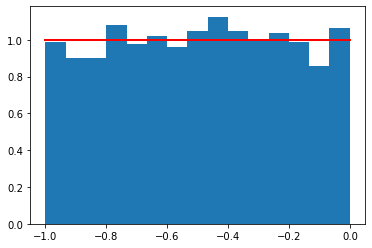

In [30]:
count, bins, ignored = plt.hist(s, 15, density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.show()

In [31]:
count

array([0.99072852, 0.90066229, 0.90066229, 1.08079475, 0.97571748,
       1.0207506 , 0.96070644, 1.05077267, 1.12582786, 1.05077267,
       1.00573956, 1.03576163, 0.99072852, 0.85562918, 1.06578371])